## Boilerplate

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# Autoencoder for dimensionality reduction

## Load data

Load MNIST data

In [2]:
# load and examine the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Pre-processing

Perform the same pre-processing as the previous examples in class.
Except, we use the input image as the class label.

In [3]:
# Keras needs the image tensors to have a channel dimension, even if there is only one channel, so we reshape the tensors accordingly.

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Convert the pixels to float32 type.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescale the pixel values to run from 0 to 1.
x_train = x_train / 255
x_test = x_test / 255

#save the digit labels (for visualization)
y_label_train = y_train
y_label_test = y_test

#use the input image as the class label (autoencoder)
y_train = x_train
y_test = x_test



## Define hyperparameters

In [4]:
#input shape:
img_shape = (x_train.shape[1], x_train.shape[2], 1)

# hyperparameters to define and train the model
batch_size = 32
epochs = 5
val_split = 0.2

#steps to cycle through entire dataset in an epoch
steps_per_epoch = int(np.floor(x_train.shape[0] *(1-val_split)  /batch_size) )



In [5]:
steps_per_epoch

1500

## Define the AutoEncoder network

Build using fully-connected layers:


In [103]:
flat_shape = np.prod(img_shape)

size_bottleneck = 1
size_encode_decode = 64

#we will define an encoder and decoder separately,
# then connect them together


#define layers of encoder

#input layer
input_layer = keras.layers.Input(img_shape)
x = keras.layers.Flatten()(input_layer)

#encoder layer
x = keras.layers.Dense(size_encode_decode, activation='linear')(x)

#bottleneck layer
encoded_layer = keras.layers.Dense(size_bottleneck, activation='linear')(x)


#define layers of decoder
encoded_shape = (size_bottleneck,)
encoded_input = keras.layers.Input(encoded_shape)

#decoder layer:
x = keras.layers.Dense(size_encode_decode, activation='linear')(encoded_input)


#output layer:
x = keras.layers.Dense(flat_shape, activation='sigmoid')(x)
output_layer = keras.layers.Reshape(img_shape)(x)

#define the models:
encoder = keras.Model(input_layer,encoded_layer)
decoder = keras.Model(encoded_input,output_layer)

#define autoencoder from input layer to output of decoder
autoencoder = keras.Model(input_layer, decoder(encoded_layer))


In [104]:
# Compile the model
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam()
metric = keras.metrics.MeanSquaredError()

autoencoder.compile(loss=[loss],
                    optimizer=optim,
                    metrics=[metric] )

# What does the finished model look like?
autoencoder.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_25 (Functional)           │ (None, 28, 28, 1)           │          51,088 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,393 (396.07 KB)

 Trainable params: 101,393 (396.07 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,305 (196.50 KB)

 Trainable params: 50,305 (196.50 KB)

 Non-trainable params: 0 (0.00 B)

encoder:


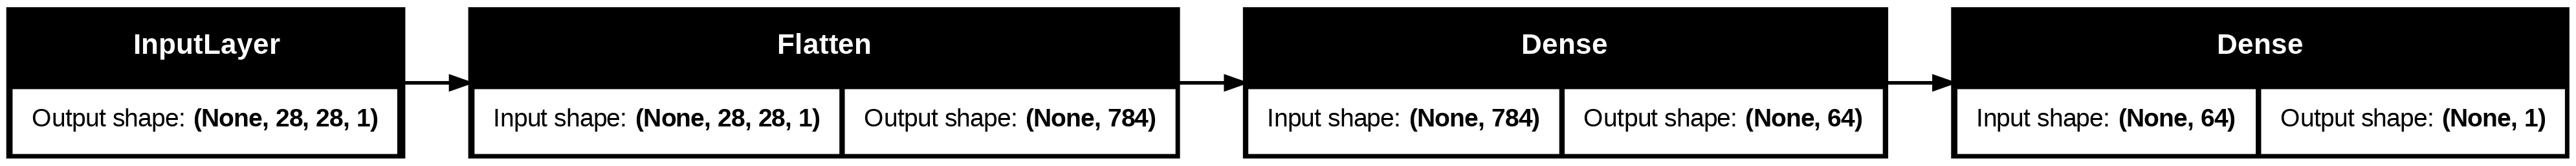

In [105]:
encoder.summary()
print('encoder:')
keras.utils.plot_model(encoder, show_shapes=True, rankdir='LR')


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,088 (199.56 KB)

 Trainable params: 51,088 (199.56 KB)

 Non-trainable params: 0 (0.00 B)

decoder:


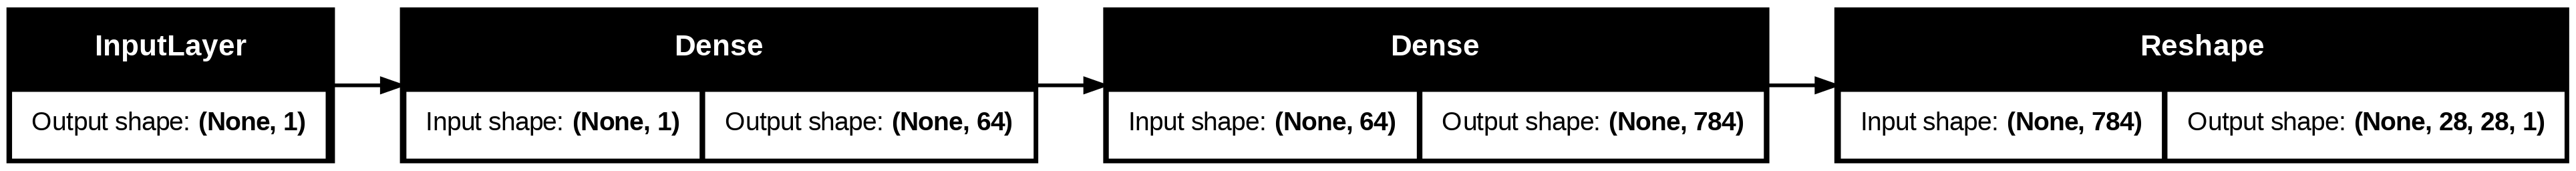

In [106]:
decoder.summary()
print('decoder:')
keras.utils.plot_model(decoder, show_shapes=True, rankdir='LR')

## Train the network

In [58]:
#fit the model
history = autoencoder.fit(x_train,y_train,
            batch_size=batch_size,
            validation_split=val_split,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0457 - val_mean_squared_error: 0.0457


## Plot the loss & metric over training epochs and test dataset

<Axes: >

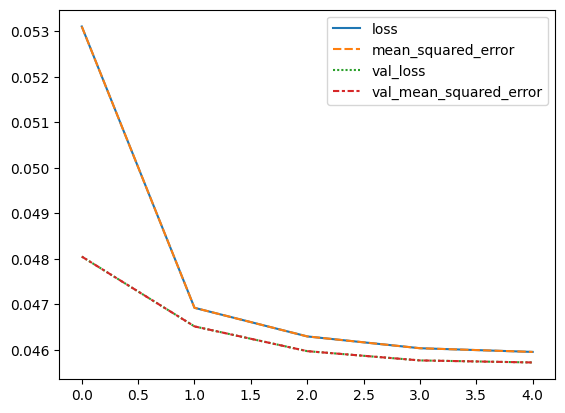

In [59]:
import seaborn as sns
sns.lineplot(data=history.history)

In [60]:
#evaluate on the test dataset:
autoencoder.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0451 - mean_squared_error: 0.0451


[0.04563913121819496, 0.04563913121819496]

## Inspect the reconstructed images

In [61]:
# run inference to get reconstructed outputs
reconst = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [80]:
# make a quick function to plot images in a MxN

def plot_mnist_compare(img_tuple,num_cols=10):
  base_size=1
  M=len(img_tuple)
  N=num_cols
  fig, axs = plt.subplots(M,N,figsize=(base_size*N,base_size*M))

  for i,img in enumerate(img_tuple):
    for j in range(N):
      axs[i,j].imshow(img[j,:,:,0])



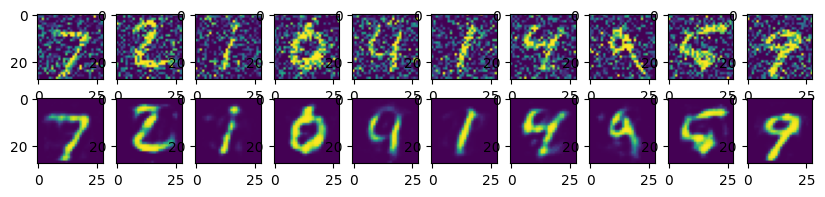

In [81]:
# call the function to plot
plot_mnist_compare((x_test,reconst))

## Inspect the encoded representations

In [64]:
#run samples through the encoder only:
encoded = encoder.predict(x_test)
encoded.shape


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 4)

In [65]:
# define a quick function to visualize a scatter plot

def plot_latent_2d(latent, class_labels):
  fig, axs = plt.subplots(figsize=(10,10))
  #loop over each digit class in mnist, plot with a number marker
  for i in range(9):
    latent_i = latent[class_labels==i]
    axs.scatter(latent_i[:,2],latent_i[:,3],marker=f'${i}$',s=50)


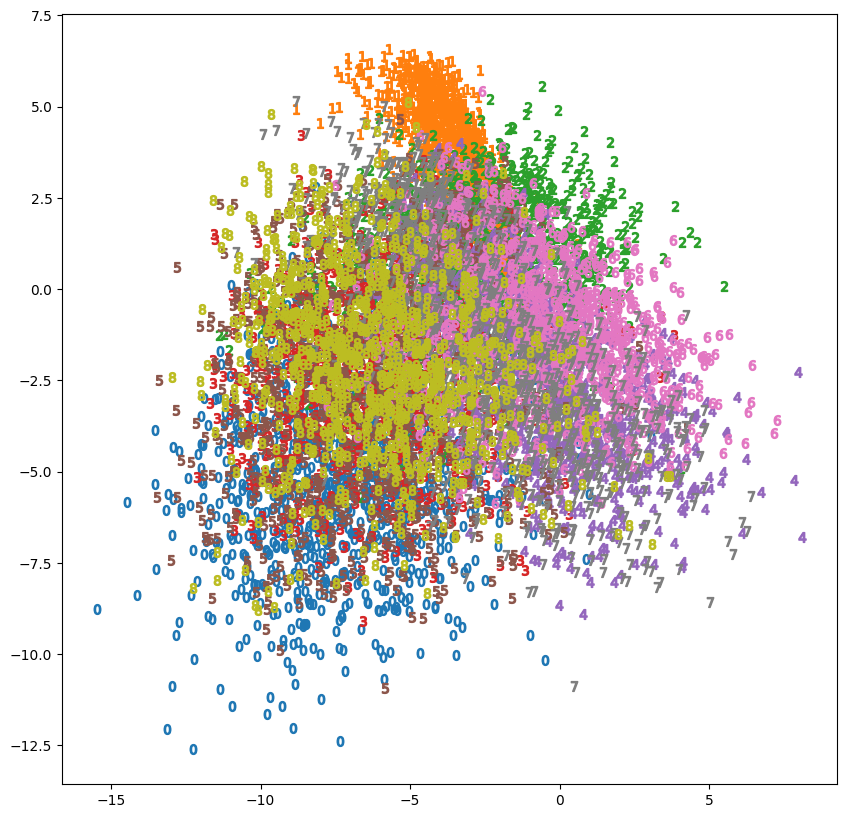

In [66]:
plot_latent_2d(encoded,y_label_test)

## Try changing the network to see the difference in encoded representations

# Denoising Autoencoder

## Adding noise

Here, in addition to applying preprocessing as in past demos, we will also add random noise to all images. We will then treat these corrupted images in the network input, x, and the original image as the network outputs, y. The class labels will not be used at all.

In [89]:
# corrupt the input images
noise_fac = 0.7
x_train = y_train + noise_fac * np.random.normal(size=y_train.shape)
x_test = y_test + noise_fac * np.random.normal(size=y_test.shape)

#clip to ensure still in 0-1 range
x_train = np.clip(x_train,0,1)
x_test = np.clip(x_test,0,1)


## Examine the data before and after adding noise:

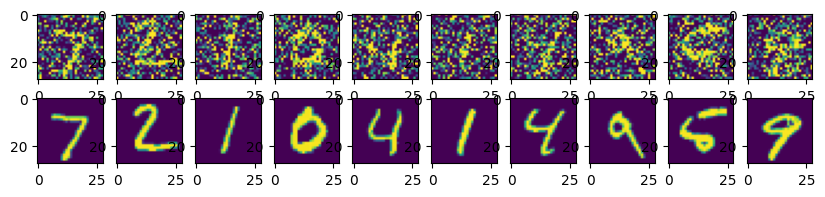

In [90]:
plot_mnist_compare((x_test,y_test))

## Define the AutoEncoder network

Copy the autoencoder already defined here, and adapt

In [107]:
# Compile the model
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam()
metric = keras.metrics.MeanSquaredError()

autoencoder.compile(loss=[loss],
                    optimizer=optim,
                    metrics=[metric] )

# What does the finished model look like?
autoencoder.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_25 (Functional)           │ (None, 28, 28, 1)           │          51,088 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,393 (396.07 KB)

 Trainable params: 101,393 (396.07 KB)

 Non-trainable params: 0 (0.00 B)

## Train the network

In [108]:
#fit the model
history = autoencoder.fit(x_train,y_train,
            batch_size=batch_size,
            validation_split=val_split,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0611 - val_mean_squared_error: 0.0611
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0610 - val_mean_squared_error: 0.0610


In [109]:
#evaluate on the test dataset:
autoencoder.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0597 - mean_squared_error: 0.0597


[0.06126704812049866, 0.06126704812049866]

## Inspect the reconstructed images

In [110]:
# run inference to get reconstructed outputs
reconst = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


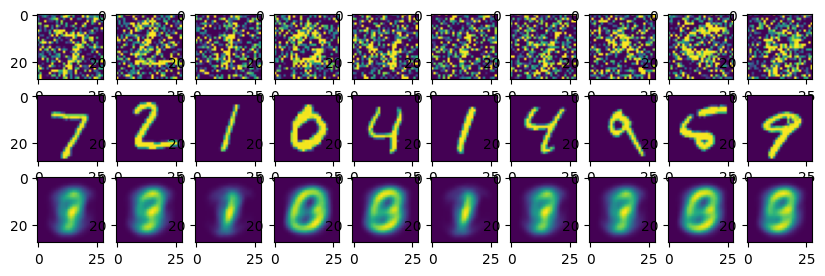

In [111]:
plot_mnist_compare((x_test,y_test,reconst))

# Bonus: Compare autoencoder to PCA?
